# In this notebook we will Implement several models  and evaluate and validate  their performance using cross validation and held out test set

In [10]:
# import required libraries
import pandas as pd
import numpy as np
import random
import pickle
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [3]:
# Import the data
pkl_file = open('data_reduced.pkl', 'rb')
data_transformed = pickle.load(pkl_file)
pkl_file.close()

In [4]:
# unpack the dictionary in to variables
Y_train = data_transformed['Y_train']
X_train = data_transformed['X_train']
Y_test = data_transformed['Y_test']
X_test = data_transformed['X_test']

In [5]:
# define R score
def r_score(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    return (np.sign(r2)*np.sqrt(np.abs(r2)))

In [6]:
# these are the final selected features after cross validating the linear model with different combinations of features
selected=['technical_20','technical_30','fundamental_11','technical_19','technical_24','id']

## Multiple regression with all the features

### Linear regression

In [7]:
clf_lin = linear_model.LinearRegression()
scores = cross_val_score(clf_lin, X_train, Y_train, cv=3, scoring= 'r2')
r2=scores.mean()
print ('Using Linear Regression with all the features and 3 fold cross validation: {:.6f}'
           .format((np.sign(r2)*np.sqrt(np.abs(r2)))))
scores = cross_val_score(clf_lin, X_train[selected], Y_train, cv=3, scoring= 'r2')
r2=scores.mean()
print ('Using Linear Regression with selected features and 3 fold cross validation: {:.6f}'
           .format((np.sign(r2)*np.sqrt(np.abs(r2)))))

Using Linear Regression with all the features and 3 fold cross validation: -0.025667
Using Linear Regression with selected features and 3 fold cross validation: -0.013704


In [8]:
clf_lin.fit(X_train[selected], Y_train)
print (r_score(Y_test,clf_lin.predict(X_test[selected])))

0.0212189860261


### Here we will plot the target y and predicted y at a randomly selected spot in time to observe their trand.

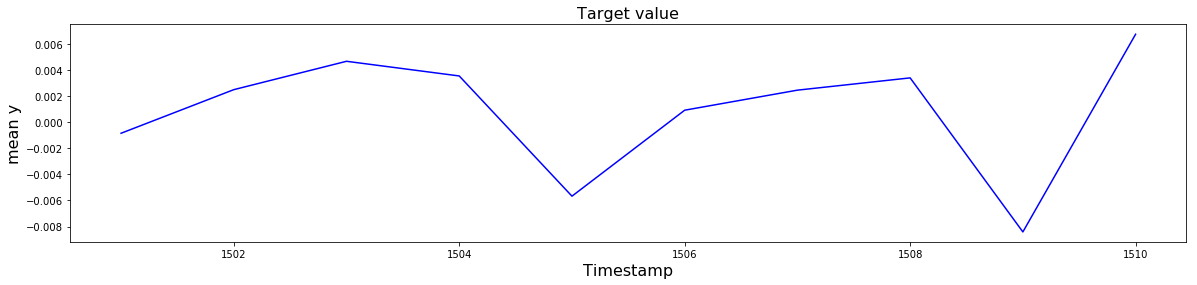

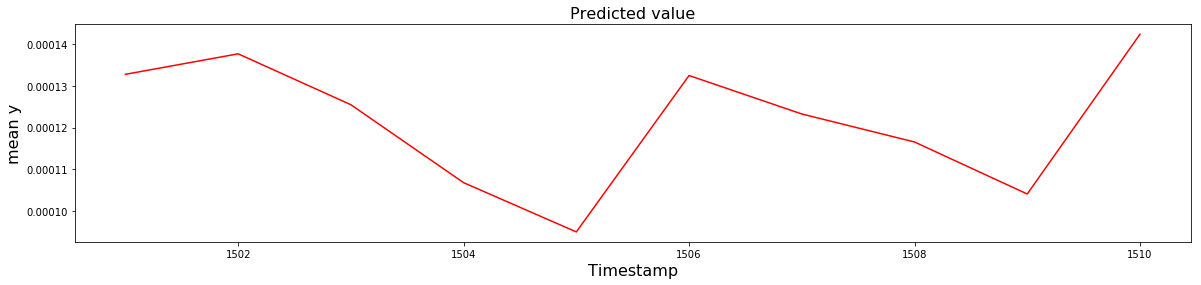

In [87]:
spot=100
dur=10
fontsize=16
target=list(X_test.groupby(['timestamp']).mean().y)[spot:spot+dur]
pred=list(X_test.groupby(['timestamp']).mean().yp)[spot:spot+dur]
ts=list(X_test.timestamp.drop_duplicates())[spot:spot+dur]
plt.figure(figsize=(20, 4), edgecolor='k')
plt.xlabel('Timestamp',fontsize=fontsize)
plt.ylabel('mean y',fontsize=fontsize)
plt.title('Target value',fontsize=fontsize)
plt.plot(ts,target,'b')
plt.figure(figsize=(20, 4), edgecolor='k')
plt.xlabel('Timestamp',fontsize=fontsize)
plt.ylabel('mean y',fontsize=fontsize)
plt.title('Predicted value',fontsize=fontsize)
plt.plot(ts,pred,'r')

### Ridge regression

In [20]:
clf_ridge = linear_model.Ridge()
parameters = {'alpha':(0.1,1,100,10000)}
clf_ridge_grid = GridSearchCV(clf_ridge, parameters, scoring='r2')
clf_ridge_grid.fit(X_train, Y_train);
print ('Using Ridge Regression with all the features and 3 fold cross validation')
for i , param in enumerate(clf_ridge_grid.cv_results_['params']):
    r2=clf_ridge_grid.cv_results_['mean_test_score'][i]
    print (param, (np.sign(r2)*np.sqrt(np.abs(r2))))
print ('Using Ridge Regression with selected features and 3 fold cross validation')
clf_ridge_grid.fit(X_train[selected], Y_train);
for i , param in enumerate(clf_ridge_grid.cv_results_['params']):
    r2=clf_ridge_grid.cv_results_['mean_test_score'][i]
    print (param, (np.sign(r2)*np.sqrt(np.abs(r2))))

Using Ridge Regression with all the features and 3 fold cross validation
{'alpha': 0.1} -0.0255642801103
{'alpha': 1} -0.0250261815727
{'alpha': 100} -0.026827816369
{'alpha': 10000} -0.0230143667801
Using Ridge Regression with selected features and 3 fold cross validation
{'alpha': 0.1} -0.0134994279524
{'alpha': 1} -0.012722403732
{'alpha': 100} -0.0162786208023
{'alpha': 10000} -0.0162720793916


In [21]:
print (r_score(Y_test,clf_ridge_grid.best_estimator_.predict(X_test[selected])))

0.0201628080104


## Random forest

### Gridsearch cv

In [8]:
from sklearn.ensemble import RandomForestRegressor
regr_rf = RandomForestRegressor(random_state=0,n_jobs=8)
parameters_rf = {'max_depth':(2,4,6),'n_estimators':(10, 50, 75)}
clf = GridSearchCV(regr_rf, parameters_rf, scoring='r2')
clf.fit(X_train[selected], Y_train);

In [9]:
print ('Using Random forest regression with selected features and cross validation')
for i , param in enumerate(clf.cv_results_['params']):
    r2=clf.cv_results_['mean_test_score'][i]
    print (param, (np.sign(r2)*np.sqrt(np.abs(r2))))

Using Random forest regression with selected features and cross validation
{'max_depth': 2, 'n_estimators': 10} -0.0075598168017
{'max_depth': 2, 'n_estimators': 50} -0.00557724075406
{'max_depth': 2, 'n_estimators': 75} -0.005580036933
{'max_depth': 4, 'n_estimators': 10} -0.016338304131
{'max_depth': 4, 'n_estimators': 50} -0.0113450520025
{'max_depth': 4, 'n_estimators': 75} -0.0124047487846
{'max_depth': 6, 'n_estimators': 10} -0.0335303385061
{'max_depth': 6, 'n_estimators': 50} -0.0234679879398
{'max_depth': 6, 'n_estimators': 75} -0.0226918029336


In [10]:
print (r_score(Y_test,clf.best_estimator_.predict(X_test[selected])))

0.0119918876359


## Ada boost

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

regr_ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2),
                          n_estimators=10, random_state=0)
scores = cross_val_score(regr_ada, X_train[selected], Y_train, cv=3, scoring= 'r2')
r2=scores.mean()
print ('Using Adaboost Regression with selected features and 3 fold cross validation: {:.6f}'
           .format((np.sign(r2)*np.sqrt(np.abs(r2)))))

Using Adaboost Regression with selected features and 3 fold cross validation: -0.049778


In [12]:
regr_ada.fit(X_train[selected], Y_train);
print (r_score(Y_test,regr_ada.predict(X_test[selected])))

-0.0313851736971


## Extra trees

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
reg_ext = ExtraTreesRegressor(n_estimators=5, criterion='mse', random_state=0)
scores = cross_val_score(reg_ext, X_train[selected], Y_train, cv=3, scoring= 'r2')
r2=scores.mean()
print ('Using Extra trees Regression with all selected features and 3 fold cross validation: {:.6f}'
           .format((np.sign(r2)*np.sqrt(np.abs(r2)))))

Using Extra trees Regression with all selected features and 3 fold cross validation: -0.611889


In [14]:
reg_ext.fit(X_train[selected], Y_train);
print (r_score(Y_test,reg_ext.predict(X_test[selected])))

-0.495540085651


## SVR

In [15]:
from sklearn.svm import SVR
parameters_svr = {'C':(0.1,0.001),'epsilon':(0.1,10.0), 'kernel':('linear','poly','rbf','sigmoid')}
reg_svr = SVR()
reg_svr_gcv = GridSearchCV(reg_svr, parameters_svr, scoring='r2')
reg_svr_gcv.fit(X_train[selected], Y_train);

In [16]:
print ('Using SVR with selected features and cross validation')
for i , param in enumerate(reg_svr_gcv.cv_results_['params']):
    r2=reg_svr_gcv.cv_results_['mean_test_score'][i]
    print (param, (np.sign(r2)*np.sqrt(np.abs(r2))))

Using SVR with selected features and cross validation
{'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'} -0.212672917379
{'C': 0.1, 'epsilon': 0.1, 'kernel': 'poly'} -0.212672917379
{'C': 0.1, 'epsilon': 0.1, 'kernel': 'rbf'} -0.212672917379
{'C': 0.1, 'epsilon': 0.1, 'kernel': 'sigmoid'} -0.212672917379
{'C': 0.1, 'epsilon': 10.0, 'kernel': 'linear'} -0.212672917379
{'C': 0.1, 'epsilon': 10.0, 'kernel': 'poly'} -0.212672917379
{'C': 0.1, 'epsilon': 10.0, 'kernel': 'rbf'} -0.212672917379
{'C': 0.1, 'epsilon': 10.0, 'kernel': 'sigmoid'} -0.212672917379
{'C': 0.001, 'epsilon': 0.1, 'kernel': 'linear'} -0.212672917379
{'C': 0.001, 'epsilon': 0.1, 'kernel': 'poly'} -0.212672917379
{'C': 0.001, 'epsilon': 0.1, 'kernel': 'rbf'} -0.212672917379
{'C': 0.001, 'epsilon': 0.1, 'kernel': 'sigmoid'} -0.212672917379
{'C': 0.001, 'epsilon': 10.0, 'kernel': 'linear'} -0.212672917379
{'C': 0.001, 'epsilon': 10.0, 'kernel': 'poly'} -0.212672917379
{'C': 0.001, 'epsilon': 10.0, 'kernel': 'rbf'} -0.2126729173

In [17]:
print (r_score(Y_test,reg_svr_gcv.best_estimator_.predict(X_test[selected])))

-0.112883749963
